In [8]:
#| hidden: true
#| echo: false
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# some personal style settings to make the plots look nice
# and save some space in the notebook
plt.style.use("../style.mplstyle")

## Welcome! 
So begins "Understanding Uncertainty", a course in statistical thinking and data science. 

This is lecture 0. See the [syllabus](../syllabus.qmd) for an overview of the course.

Our basic goals for the course are:

1) to build a strong intuition about data, where it comes from, and what questions it can answer. 

2) to learn the basic computational skills needed to manipulate and analyze data. Working with data also helps with (1)!

## Why statistics? 
Statistics is, essentially, the study of data and how to use it. People argue about the purpose of statistics, but basically you can do 3 things with data: (1) description, (2) inference, and (3) prediction. 

## Description
Descriptive statistics is the process of summarizing data. This can be done with numbers (e.g., mean, median, standard deviation) or with visualizations (e.g., histograms, boxplots). Descriptive statistics, importantly, are completely limited to the sample of data at hand. 

Let's load in some data and take a look at it.

The [dataset](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata) contains Airbnb listings in New York City, including prices, locations, and other features. 

In [58]:
# from https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata
# import the data on Airbnb listings in the New York City
airbnb = pd.read_csv("../data/airbnb.csv")
# data cleaning
airbnb = airbnb.rename(columns={"neighbourhood group": "borough"})
airbnb = airbnb.dropna(subset=["borough", "price", "long", "lat"])
airbnb["borough"] = airbnb["borough"].str.lower()
airbnb["borough"] = airbnb["borough"].str.replace("manhatan", "manhattan")
airbnb["borough"] = airbnb["borough"].str.replace("brookln", "brooklyn")
# print column names
print(airbnb.columns.values)


['id' 'NAME' 'host id' 'host_identity_verified' 'host name' 'borough'
 'neighbourhood' 'lat' 'long' 'country' 'country code' 'instant_bookable'
 'cancellation_policy' 'room type' 'Construction year' 'price'
 'service fee' 'minimum nights' 'number of reviews' 'last review'
 'reviews per month' 'review rate number' 'calculated host listings count'
 'availability 365' 'house_rules' 'license']


/var/folders/7h/662tdm8d6sn0krrht717wzmm0000gq/T/ipykernel_45760/1882577076.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("../data/airbnb.csv")


In [59]:
# print the first 5 rows
airbnb[:5]

,id,NAME,host id,host_identity_verified,host name,borough,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Now there's a lot you can do, but let's start with a simple histogram of the price of listings.


Text(0, 0.5, 'Frequency')

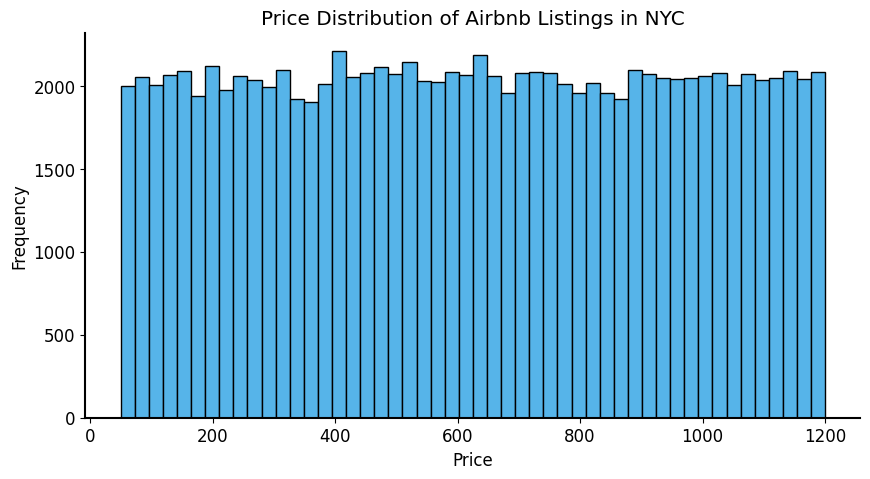

In [69]:
# format the price column
airbnb['price'] = airbnb['price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
# plot a histogram of the price column
plt.figure(figsize=(10, 5))
plt.hist(airbnb['price'], bins=50)
plt.title('Price Distribution of Airbnb Listings in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')

Computing statistics like the mean, standard deviation, and quartiles is easy.

In [61]:
airbnb["price"].describe()

count    102316.000000
mean        625.291665
std         331.677344
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

We can even use specialized libraries to make use of the geographic information in the data. For example, we can use the `geopandas` library to plot the locations of listings on a map of New York City. 

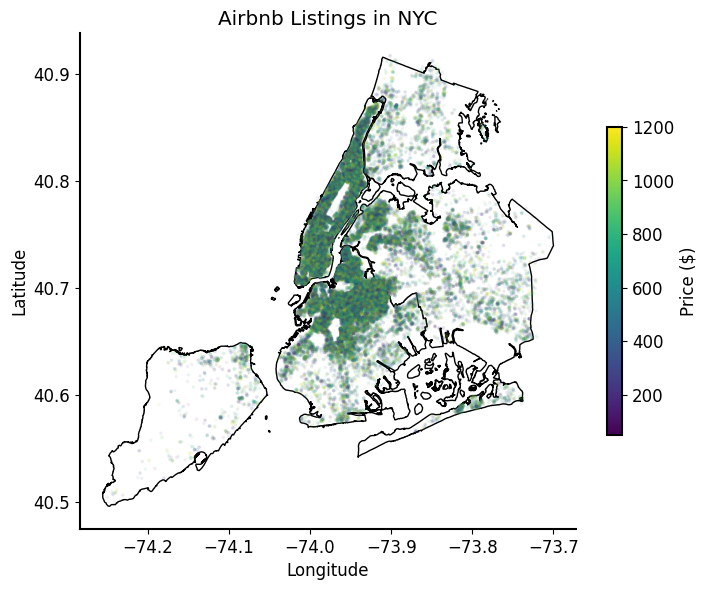

In [62]:
import geopandas as gpd
from geodatasets import get_path
# load the shapefile of NYC neighborhoods
nyc_neighborhoods = gpd.read_file(get_path('nybb'))
nyc_neighborhoods = nyc_neighborhoods.to_crs(epsg=4326)  # convert to WGS84
# plot the neighborhoods with airbnb listings
nyc_neighborhoods.plot(figsize=(8, 8), color='white', edgecolor='black')
# plot the airbnb listings on top of the neighborhoods
# use the 'long' and 'lat' columns to create a GeoDataFrame
airbnb_gdf = gpd.GeoDataFrame(airbnb, geometry=gpd.points_from_xy(airbnb['long'], airbnb['lat']), crs='EPSG:4326')
# set the coordinate reference system to WGS84
airbnb_gdf.plot(ax=plt.gca(), column="price", markersize=3, alpha=0.05, legend=True, cmap='viridis', legend_kwds={'shrink': 0.5, 'label': 'Price ($)'})
plt.title('Airbnb Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

There is a lot of information in the data, and we can summarize it in many different ways. But descriptive statistics **only describe the data**. 

Why is this limiting? After all, we like data -- it tells us things about the world and it's objective and quantifiable. 

The problem is that data is not always complete. In fact, it almost never is. And incomplete data can lead to misleading conclusions.

Let's look at our Airbnb data again. What if instead of looking at the entire dataset, we only looked at a small "sample" or subset of the data?

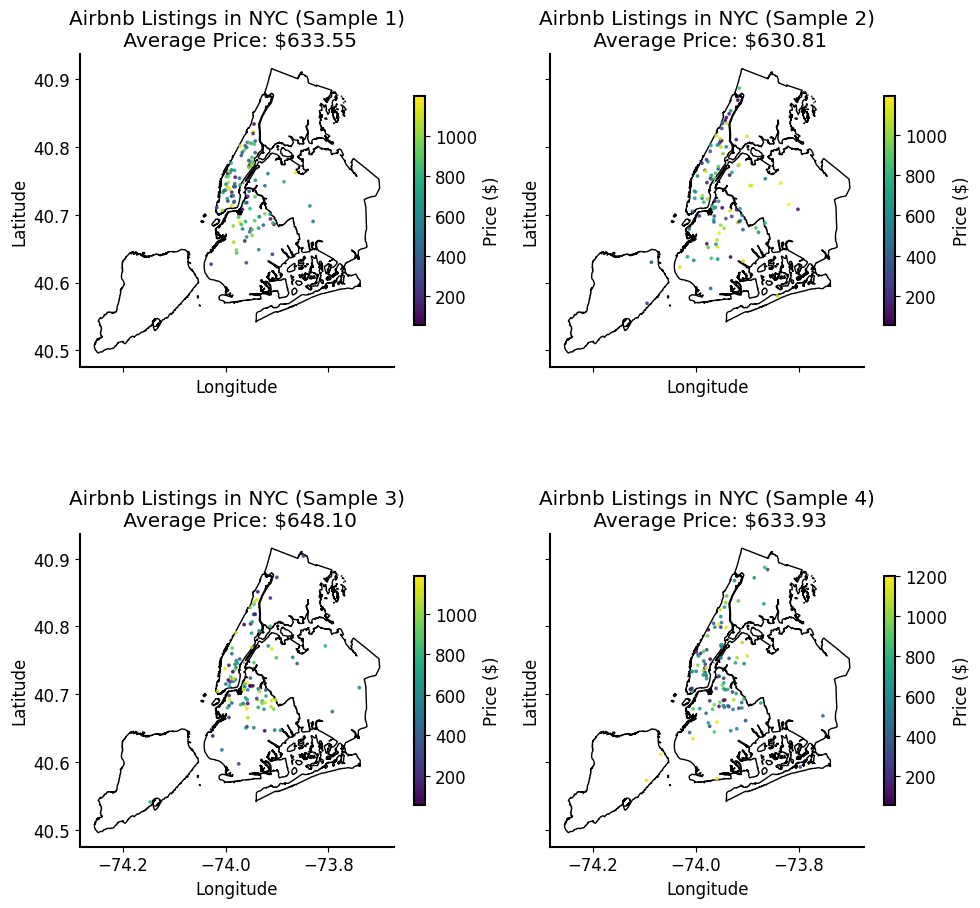

In [63]:
# separately plot 3 samples of airbnb listings
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(4):
    # sample 1000 listings
    sample = airbnb.sample(100, random_state=i)
    # plot the neighborhoods with airbnb listings
    nyc_neighborhoods.plot(ax=ax[i], color='white', edgecolor='black')
    # plot the airbnb listings on top of the neighborhoods
    # use the 'long' and 'lat' columns to create a GeoDataFrame
    airbnb_gdf_sample = gpd.GeoDataFrame(sample, geometry=gpd.points_from_xy(sample['long'], sample['lat']), crs='EPSG:4326')
    # set the coordinate reference system to WGS84
    airbnb_gdf_sample.plot(ax=ax[i], column="price", markersize=3, alpha=0.8, legend=True, cmap='viridis', legend_kwds={'shrink': 0.5, 'label': 'Price ($)'})
    ax[i].set_title(f'Airbnb Listings in NYC (Sample {i+1})\n Average Price: ${sample["price"].mean():.2f}')
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')
plt.tight_layout()
plt.show()

Notice how the samples differ from one another. They have different geography and different prices. This means you can't just look at the descriptive statistics of a single sample and draw conclusions about the entire population.

::: {.callout-note title="Sample vs. Population" collapse="true"}
A **population** is the entire set of data that you are interested in. A **sample** is a subset of a population. For example, if you are interested in the average price of all Airbnb listings in New York City, then the population is all of those listings. A sample would be a smaller subset of those listings, which may or may not be representative of the entire population.

Note that this definition is flexible. For example, if you are interested in the average price of all short-term rentals in New York City, then the population is all rentals. Even an exhaustive list of Airbnb listings would just be a sample from that population.

Often, the population is actually more abstract or theoretical. For example, if you are interested in the average price of all possible Airbnb listings in New York City, then the population includes all potential listings, not just the ones that currently exist.
:::

Descriptive statistics are useful for understanding the data at hand, but they don't necessarily tell us much about the world outside of the data. For that, we need to do something more. 

## Inference

So what if we want to answer questions about a population *based* on a sample? This is where **inference** comes in. Specifically, we want to use the given sample to **infer** something about the population.

How do we do this if we can't ever see the entire population? The answer is that we need a link which connects the sample to the population -- specifically, we can explicitly treat the sample as the outcome of a **data-generating process** (DGP).

:::{.callout-caution title="There is always a DGP" collapse="true"}
A **data-generating process** (DGP) is a theoretical construct that describes how data is generated in a population. It encompasses all the factors that influence the data, including the underlying mechanisms and relationships between variables.

There *has* to be a DGP, even if we don't know what it is. The DGP is the process that generates the data we observe.

The full, true DGP is usually unknown. However, we can make assumptions about it and use those assumptions to draw inferences about the population (in the case that our assumptions are correct).
:::

Of course, we don't necessarily know what the DGP is. If we we knew everything about how the data was generated, we probably would not have any questions to ask in the first place!

This is where the **model** comes in. A model is a simplified mathematical representation of the DGP that allows us to make inferences about the population based on the sample. At the end of the day, a model is sort of a guess -- a guess about where your data come from.  

:::{.callout-tip title="All models are wrong" collapse="true"}
There is a very famous and oft-cited quote by George Box, a statistician, that goes:

> "All models are wrong, but some are useful."

This means that all mathematical models are simplifications of reality, and they will never perfectly capture the true DGP. However, some models can still be useful for making predictions or drawing inferences about the population. We will talk more about this and see examples throughout the course.
:::





### A simple model

We'll talk about probability distributions in more detail later in the course, but for now let's just say that a probability distribution is a mathematical function that describes the likelihood of different outcomes in a random process.

The most basic example is a coin flip. If we flip a fair coin, there are two possible outcomes: heads or tails. The probability of each outcome is 0.5, so we can represent this with a simple probability distribution.

\begin{equation}
P(X) = \begin{cases}
0.5 & \text{if } X = \text{heads} \\
0.5 & \text{if } X = \text{tails} \\
0 & \text{otherwise}
\end{cases}
\end{equation}



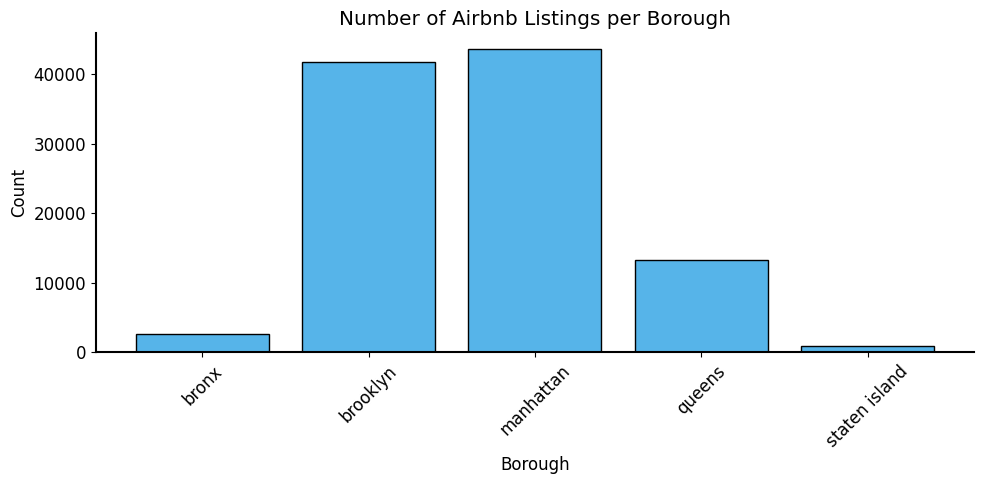

In [70]:
# average price per borough
borough_price = airbnb.groupby('borough')['price'].count().reset_index()
# plot the average price per borough
plt.figure(figsize=(10, 5))
plt.bar(borough_price['borough'], borough_price['price'])
plt.title('Number of Airbnb Listings per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Airbnb Listings in NYC by borough')

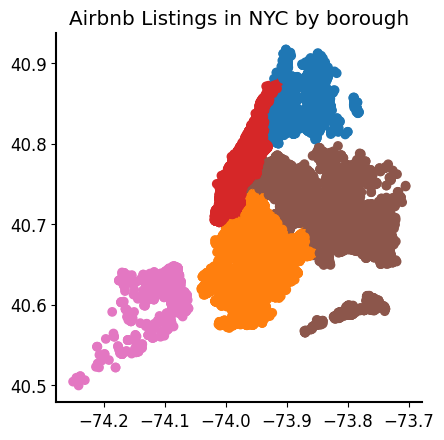

In [47]:
airbnb_gdf.plot(column="neighbourhood group")
plt.title('Airbnb Listings in NYC by borough')

## Prediction

Prediction is the process of using a model to make predictions about unseen (or future) data. 

Take $X \sim \text{Uniform}(0, 1)$

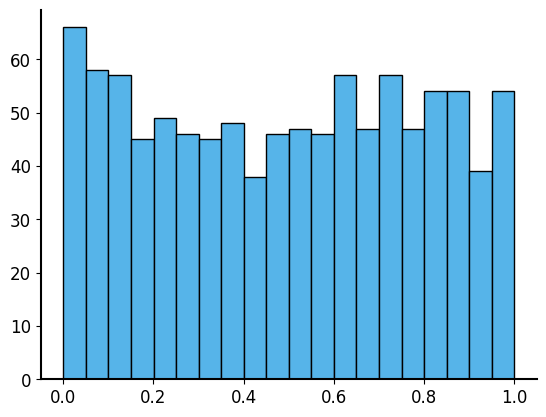

In [40]:
x = np.random.uniform(0, 1, 1000)

plt.hist(x, bins=20, edgecolor="black")
plt.show()

```{pyodide}
import numpy as np
import matplotlib.pyplot as plt

for x in range(10):
    print(x)
#TODO: add code to generate a uniform distribution

```

### Quick exercise

In [ ]:
#| echo: false
from jupyterquiz import display_quiz

example = [{"question": "What color is my hair",
          "type": "many_choice",
          "answers":[
            {"answer": "Brown", "correct":True},
            {"answer": "Blonde", "correct":False}
]}]

display_quiz(example)

<IPython.core.display.Javascript object>